Mounting Google Drive

In [1]:

!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing libraries

In [2]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


from utils import (
   test, train, plot_losses

)

from model import Net
from torchsummary import summary

from torch.optim.lr_scheduler import StepLR
%matplotlib inline

Updating Device to CUDA

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu") #c2

CUDA Available? True


Defining data tranformations

In [4]:
train_transforms = transforms.Compose([
   #transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    #transforms.Resize((28, 28)),
    #transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])



Downloading MNIST dataset and splitting to train and test set

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 104476811.30it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 114929500.78it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26082349.25it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20484439.54it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



Creating Data Loaders from train data and test data

In [6]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

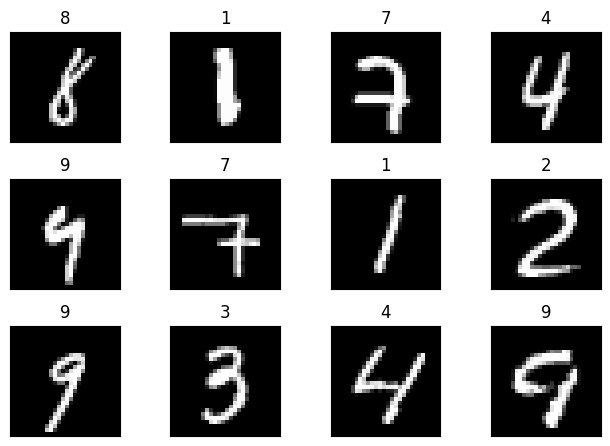

In [7]:
batch_data, batch_label = next(iter(train_loader))
fig = plt.figure()
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.tight_layout()
    plt.imshow(batch_data[i].squeeze(0), cmap='gray')
    plt.title(batch_label[i].item())
    plt.xticks([])
    plt.yticks([])
plt.show()

## Data Statistics

torch.Size([512, 1, 28, 28])
torch.Size([512])


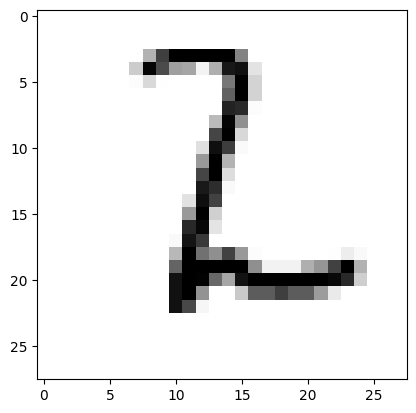

In [8]:
# train_data1 = train_data.train_data
# train_data = train_data.transform(train_data1.numpy())

# print('[Train]')
# print(' - Numpy Shape:', train_data.train_data.cpu().numpy().shape)
# print(' - Tensor Shape:', train_data.train_data.size())
# print(' - min:', torch.min(train_data))
# print(' - max:', torch.max(train_data))
# print(' - mean:', torch.mean(train_data))
# print(' - std:', torch.std(train_data))
# print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

Viewing images

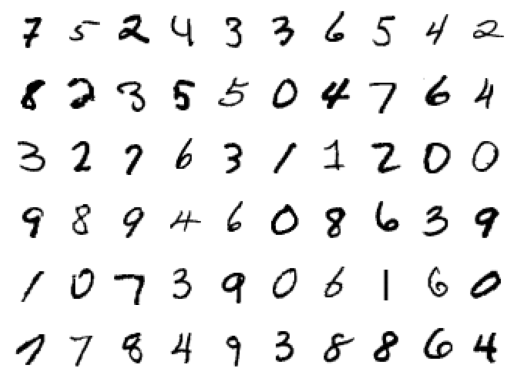

In [9]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

Transferring model to GPU and printing model summary

In [10]:
model1 = Net().to(device)
summary(model1, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
            Conv2d-4           [-1, 10, 24, 24]             900
              ReLU-5           [-1, 10, 24, 24]               0
       BatchNorm2d-6           [-1, 10, 24, 24]              20
            Conv2d-7           [-1, 10, 22, 22]             900
              ReLU-8           [-1, 10, 22, 22]               0
       BatchNorm2d-9           [-1, 10, 22, 22]              20
        MaxPool2d-10           [-1, 10, 11, 11]               0
           Conv2d-11           [-1, 16, 11, 11]             160
             ReLU-12           [-1, 16, 11, 11]               0
      BatchNorm2d-13           [-1, 16, 11, 11]              32
           Conv2d-14             [-1, 1

Training and evaluating the model

In [11]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.25)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer)
    test(model, device, test_loader)
    for param_group in optimizer.param_groups:
      print(param_group['lr'],epoch+1)
    scheduler.step()

EPOCH: 0


Train: Loss=0.1226 Batch_id=117 Accuracy=90.15: 100%|██████████| 118/118 [00:15<00:00,  7.49it/s]


Test set: Average loss: 0.0769, Accuracy: 9774/10000 (97.74%)

0.01 1
EPOCH: 1


Train: Loss=0.0203 Batch_id=117 Accuracy=97.96: 100%|██████████| 118/118 [00:15<00:00,  7.44it/s]


Test set: Average loss: 0.0552, Accuracy: 9838/10000 (98.38%)

0.01 2
EPOCH: 2


Train: Loss=0.0397 Batch_id=117 Accuracy=98.50: 100%|██████████| 118/118 [00:17<00:00,  6.83it/s]


Test set: Average loss: 0.0441, Accuracy: 9857/10000 (98.57%)

0.01 3
EPOCH: 3


Train: Loss=0.0134 Batch_id=117 Accuracy=98.80: 100%|██████████| 118/118 [00:15<00:00,  7.49it/s]


Test set: Average loss: 0.0433, Accuracy: 9865/10000 (98.65%)

0.01 4
EPOCH: 4


Train: Loss=0.0063 Batch_id=117 Accuracy=99.00: 100%|██████████| 118/118 [00:15<00:00,  7.80it/s]


Test set: Average loss: 0.0352, Accuracy: 9883/10000 (98.83%)

0.01 5
EPOCH: 5


Train: Loss=0.0063 Batch_id=117 Accuracy=99.13: 100%|██████████| 118/118 [00:15<00:00,  7.70it/s]


Test set: Average loss: 0.0325, Accuracy: 9905/10000 (99.05%)

0.01 6
EPOCH: 6


Train: Loss=0.0566 Batch_id=117 Accuracy=99.34: 100%|██████████| 118/118 [00:15<00:00,  7.42it/s]


Test set: Average loss: 0.0302, Accuracy: 9905/10000 (99.05%)

0.0025 7
EPOCH: 7


Train: Loss=0.0165 Batch_id=117 Accuracy=99.43: 100%|██████████| 118/118 [00:15<00:00,  7.80it/s]


Test set: Average loss: 0.0300, Accuracy: 9902/10000 (99.02%)

0.0025 8
EPOCH: 8


Train: Loss=0.0275 Batch_id=117 Accuracy=99.45: 100%|██████████| 118/118 [00:15<00:00,  7.68it/s]


Test set: Average loss: 0.0295, Accuracy: 9907/10000 (99.07%)

0.0025 9
EPOCH: 9


Train: Loss=0.0126 Batch_id=117 Accuracy=99.49: 100%|██████████| 118/118 [00:15<00:00,  7.79it/s]


Test set: Average loss: 0.0297, Accuracy: 9906/10000 (99.06%)

0.0025 10
EPOCH: 10


Train: Loss=0.0290 Batch_id=117 Accuracy=99.50: 100%|██████████| 118/118 [00:15<00:00,  7.75it/s]


Test set: Average loss: 0.0288, Accuracy: 9905/10000 (99.05%)

0.0025 11
EPOCH: 11


Train: Loss=0.0109 Batch_id=117 Accuracy=99.52: 100%|██████████| 118/118 [00:16<00:00,  7.02it/s]


Test set: Average loss: 0.0307, Accuracy: 9904/10000 (99.04%)

0.0025 12
EPOCH: 12


Train: Loss=0.0363 Batch_id=117 Accuracy=99.57: 100%|██████████| 118/118 [00:19<00:00,  6.00it/s]


Test set: Average loss: 0.0289, Accuracy: 9907/10000 (99.07%)

0.000625 13
EPOCH: 13


Train: Loss=0.0093 Batch_id=117 Accuracy=99.57: 100%|██████████| 118/118 [00:15<00:00,  7.42it/s]


Test set: Average loss: 0.0288, Accuracy: 9906/10000 (99.06%)

0.000625 14
EPOCH: 14


Train: Loss=0.0065 Batch_id=117 Accuracy=99.59: 100%|██████████| 118/118 [00:15<00:00,  7.81it/s]


Test set: Average loss: 0.0286, Accuracy: 9906/10000 (99.06%)

0.000625 15
EPOCH: 15


Train: Loss=0.0054 Batch_id=117 Accuracy=99.59: 100%|██████████| 118/118 [00:15<00:00,  7.71it/s]


Test set: Average loss: 0.0283, Accuracy: 9906/10000 (99.06%)

0.000625 16
EPOCH: 16


Train: Loss=0.0249 Batch_id=117 Accuracy=99.58: 100%|██████████| 118/118 [00:16<00:00,  7.37it/s]


Test set: Average loss: 0.0284, Accuracy: 9910/10000 (99.10%)

0.000625 17
EPOCH: 17


Train: Loss=0.0055 Batch_id=117 Accuracy=99.59: 100%|██████████| 118/118 [00:16<00:00,  7.28it/s]


Test set: Average loss: 0.0284, Accuracy: 9910/10000 (99.10%)

0.000625 18
EPOCH: 18


Train: Loss=0.0099 Batch_id=117 Accuracy=99.61: 100%|██████████| 118/118 [00:15<00:00,  7.78it/s]


Test set: Average loss: 0.0282, Accuracy: 9907/10000 (99.07%)

0.00015625 19
EPOCH: 19


Train: Loss=0.0173 Batch_id=117 Accuracy=99.60: 100%|██████████| 118/118 [00:16<00:00,  7.18it/s]


Test set: Average loss: 0.0283, Accuracy: 9908/10000 (99.08%)

0.00015625 20


## Plot Losses

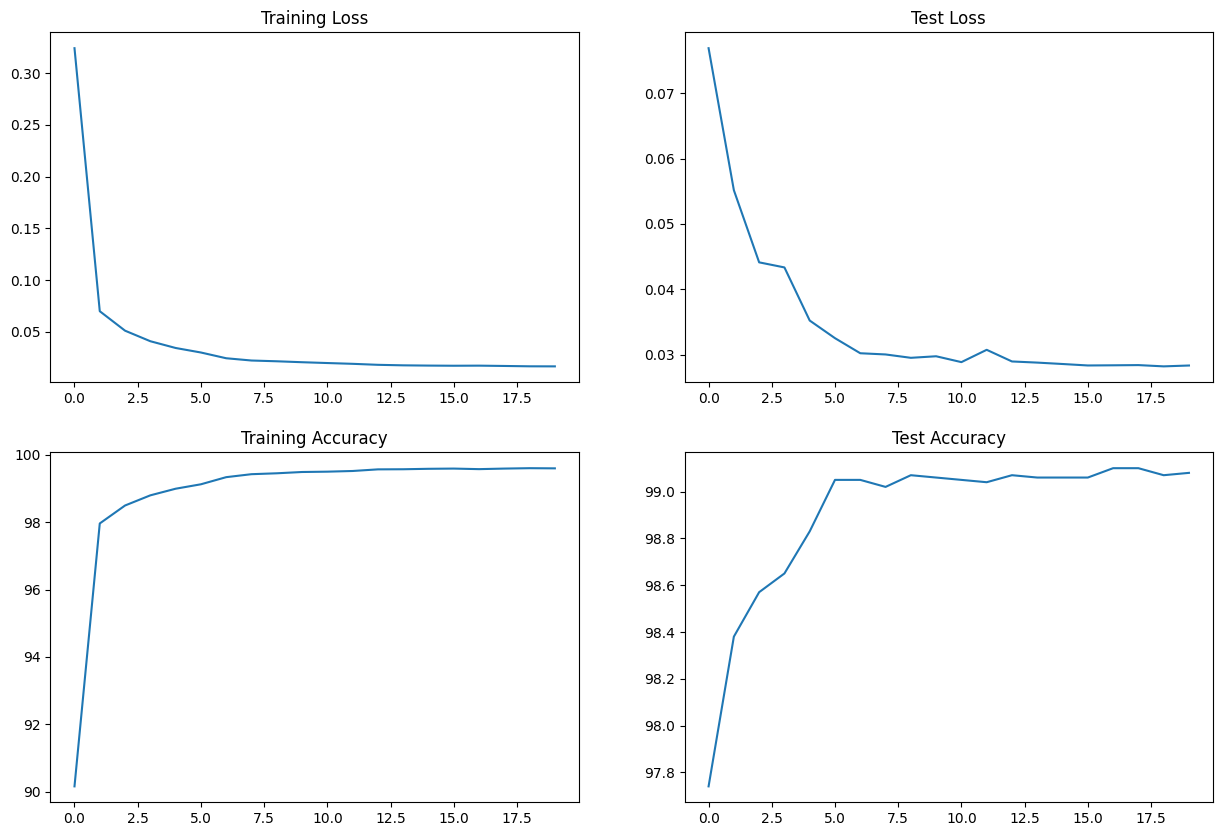

In [12]:
plot_losses()

# Objective:

* Add Learning rate scheduler for faster convergence

# Results:
* Total Parameters: 14.4k

* Best Training Accuracy: 99.60 (20th epoch)

* Best Test Accuracy: 99.20 (17th epoch)

# Analysis:
Learning rate scheduler makes faster convergence.